### Logistic Regression

Here we build a logistic regression package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time

import sklearn
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
from sklearn.preprocessing import StandardScaler as sk_StandardScaler

%matplotlib inline

In [2]:
# Import the data with pandas

data = pd.read_csv("spambase.csv")
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


The is a spam dataset with 57 features and a binary label.
It is described in detail here: https://archive.ics.uci.edu/ml/datasets/spambase


It looks like we will need to scale the data:

In [3]:
y = np.array(data.iloc[:, -1])  # This is the last column of the data
n = len(y)
X = np.hstack((np.ones((n, 1)), data.iloc[:,0:-1]))
m = len(X.T)

#Required for convergence
X = sk_StandardScaler().fit_transform(X)

In [4]:
# Here we build our classifier
# TODO impliment arbitrary cost functions or metrics

class LogisticRegression:
    def __init__(self, ld=1e-5, stepsize=1, iters = 1e4, tol=1):
        """
        Constructor for LogisticRegression class
        :param ld: (float) regularization weighting
        :param stepsize: (float) Gradient descent step size
        :param iters: (int) Maximum iterations 
        :param tol: (float) Convergence criteria
        """
        B = np.zeros(m)
        self.stepsize=stepsize
        self.ld=ld
        self.tol = tol
        self.iters = np.int(iters)
        
    def predict(self, X, threshold=0.5):
        """
        Binary predictions
        :param X: (numpy array) input vectors
        :param threshold: (float) classification threshold
        :return: (vector) Vector of binary predictions
        """
        return np.digitize(expit(X @ self.B.T), [threshold], True)
    
    def predict_proba(self, X):
        """
        Continuous/probabilistic redictions
        :param X: (array) input vectors
        :return: (vector) Vector of estimated probabilities
        """
        return expit(X @ self.B.T)

    def GD_step(self, X, B, y):
        """
        A single iteration of gradient descent
        :param X: (array) input vectors
        :param B: (vector) LR coefficients
        :param y: (vector) targets
        """
        n = len(y)
        h = expit(X@B)
        deltaJ = (self.stepsize/n)* (X.T @ (h - y)  + 2 * self.ld * B)
        return (B - self.stepsize * deltaJ)

    def NLL(self, X, B, y):
        """
        Calculate the cost as total negative log-liklihood
        :param X: (array) input vectors
        :param B: (vector) LR coefficients
        :param y: (vector) targets
        """
        type1 = sum(-y*np.log(expit(X@B)))
        type2 = sum((1- y) * np.log(1-expit(X@B)))
        L2 = sum(self.ld * B**2)
        cost = np.nansum([type1.T, -type2.T]) + L2
        return cost
    
    def accuracy_breakdown(self, X, y, threshold=0.5):
        """
        This returns a summary of the confusion matrix
        :parm X: (array) input vectors
        :param y: (vector) targets
        :returns: (dict) breakdown of true and false positive and negatives
        """
        result, count = np.unique(y - LR.predict(X, threshold=threshold)*0.1, return_counts=True)
        return dict(zip(['False Positive', 'True Negative', 'True Positive', 'False Negative'], count))

    def fit(self, X, y, B=np.zeros(len(X.T)).T, verbose=True):
        """
        Perform a GD fit
        :param X: (array) input vectors
        :param y: (vector) targets
        :param B: (vector) LR coefficients:
        :param verbose: (bool) verbosity
        """
        conv = np.zeros(self.iters)
        i =0
        while True:
            B = self.GD_step(X, B, y)
            conv[i] = self.NLL(X,B, y)
            if ((conv[i] - conv[i-1]) >  conv[i] * 1.44):
                print("Diverging!")
                return conv
            if (np.abs(conv[i-1] - conv[i]) < self.tol):
                if verbose: 
                    print("Converged in %s iterations!" % i)
                conv = conv[0:i]
                self.B = B
                return conv
            if i== self.iters-1: 
                print("Max iters reached! ")
                conv = conv[0:i]
                self.B = B
                return conv
            if verbose:
                print("\rIter: %s, Cost: %.2f" % (i, conv[i]), end =" ")
            i += 1    

    def crossValidate(self, X, y, folds=np.sqrt(X.shape[0]), verbose=True, **kwargs):
        """
        Crossvalidate the model
        :param X: (matrix) Input vectors
        :param y: (vector) Targets
        :param folds: (int) Number of CV iterations
        :param verbose: (bool) Verbosity
        :param **kwargs: (dict) Keywords for self.fit
        :return: (float) Estimated tests accuracy
        """ 
        # TODO impliment arbitrary metric function 
        results = np.zeros(folds)
        chunks = chunk(np.hstack((X, np.array([y]).T)), folds)
        for i in range(len(chunks)): 
            val_model = LogisticRegression(self.ld, self.stepsize, self.iters, self.tol)
            X_train = np.vstack(chunks[np.arange(folds) != i])[:, 0:-1]
            y_train = np.vstack(chunks[np.arange(folds) != i])[:, -1]
            
            X_test = chunks[i][:, 0:-1]
            y_test = chunks[i][:, -1]
                    
            val_model.fit(X_train, y_train, verbose=False, **kwargs)
            results[i] = val_model.accuracy(X_test, y_test)
            
            if verbose:
                print("\rIter %s accuracy: %.3f" % (i, results[i]))            
        mean = np.mean(results)
        std =  np.std(results)
        
        if std > 0.05:
            print("Warning - low confidence")
        return np.mean(results)

    def accuracy(self, X, y, threshold=0.5):
        """
        Calculates accuracy
        :param X: (array) Input vectors
        :param y: (vector) Labels
        :return: (float) accuracy
        """
        matrix = y == self.predict(X, threshold=threshold)
        return np.mean(matrix)
    
    def print_confusion_matrix(self, X, y, threshold=0.5):
        """
        Prints confusion matrix
        :param X: (array) Input vectors
        :param y: (vector) targets
        """
        breakdown = self.accuracy_breakdown(X, y, threshold=0.5)
        print("~~~~~~~~~~~~~~")
        print('{{{:6}'.format('TP') + '{:>6}}}'.format('FP'))
        print('{{{:6}'.format(breakdown['True Positive']) + '{:>6}}}'.format(breakdown['False Positive']))
        print('{{{:6}'.format(breakdown['False Negative']) + '{:>6}}}'.format(breakdown['True Negative']))
        print('{{{:6}'.format('FN') + '{:>6}}}'.format('TN'))
        print("~~~~~~~~~~~~~~")


In [5]:
# Two other tools we will need: 

def expit(X, epsilon=1e-6):
    """
    Expit function with slight nudge to prevent numerical errors
    :param X: (array) Input vectors
    :param epsilon: (float) Nudget coefficient
    """
    from scipy.special import expit as spexpit
    return spexpit(X) - (spexpit(X) - 0.5) * epsilon

def chunk(X, chunks):
    """
    Shuffles an array into chunks for cross-validation
    :param X: input vectors
    :param chunks: number of fold
    """
    np.random.shuffle(X)
    return np.asarray(np.array_split(X, chunks, 0))
    

In [6]:
LR = LogisticRegression(stepsize=1e-1, iters=5E4, tol=5E-1)
conv = LR.fit(X, y)

Iter: 556, Cost: 1517.38 Converged in 557 iterations!


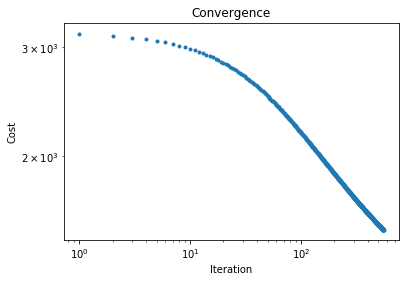

In [7]:
plt.loglog(conv, '.')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Convergence")

plt.show()

Clearly our model is converging! 

In [8]:
LR_sk = sk_LogisticRegression()
LR_sk.fit(X, y)

print(LR.accuracy(X, y))
print(LR_sk.score(X, y))



0.9128450336883286
0.9302325581395349


C:\Users\strix\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Our results are similar to the SKLearn implimentation. Our accuracy is slightly lower,  but this is likely due to difference convergence conditions

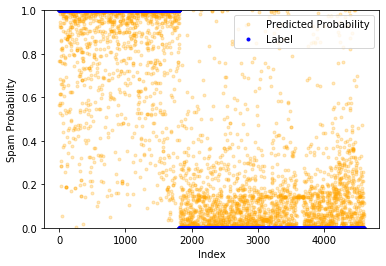

In [21]:
plt.plot(LR.predict_proba(X), '.', alpha=0.25, color='Orange')
plt.plot(y, '.', color='Blue')

plt.ylim((0, 1))
plt.xlabel("Index")
plt.ylabel("Spam Probability")
plt.legend(("Predicted Probability", "Label",))

plt.show()

The predictive power of our model is obvious; it is clear that the predicted probability of belonging to the Spam class is near 1 for most spam emails and near 0 for most legitimate emails 

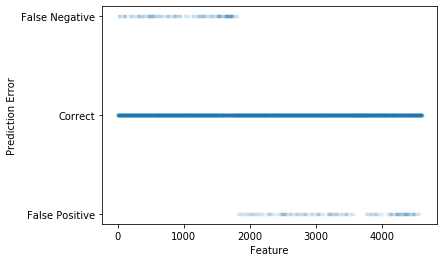

In [10]:
plt.xlabel("Feature")
plt.ylabel("Prediction Error")

plt.yticks((-1, 0, 1), ["False Positive", "Correct", "False Negative"])
plt.plot(y - LR.predict(X), '.', alpha=0.05)
plt.show()

In [11]:
validation_accuracy = LR.crossValidate(X, y, folds=5)

print('Validation Accuracy: %.3f' % validation_accuracy)

Iter 0 accuracy: 0.917
Iter 1 accuracy: 0.913
Iter 2 accuracy: 0.904
Iter 3 accuracy: 0.905
Iter 4 accuracy: 0.902
Validation Accuracy: 0.908


Our validation accuracy is ~92%, which appears excellent. Let's break down our results:

In [12]:
print(LR.accuracy_breakdown(X, y))

print('')
LR.print_confusion_matrix(X, y)

{'False Positive': 212, 'True Negative': 2576, 'True Positive': 1624, 'False Negative': 189}

~~~~~~~~~~~~~~
{TP        FP}
{  1624   212}
{   189  2576}
{FN        TN}
~~~~~~~~~~~~~~


It is important to avoid false positives in spam detection, so we raise the detection threshold. 

In [13]:
result, count = np.unique(y - LR.predict(X, threshold=0.95)*0.1, return_counts=True)
results = dict(zip(['False Positive', 'True Negative', 'True Positive', 'False Negative'], count))
print(results)

{'False Positive': 13, 'True Negative': 2775, 'True Positive': 511, 'False Negative': 1302}


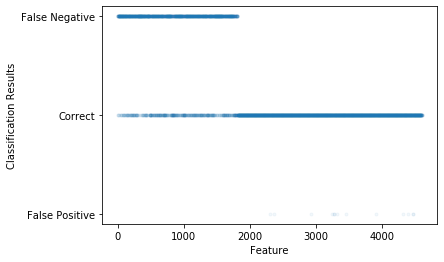

In [14]:
plt.xlabel("Feature")
plt.ylabel("Classification Results")

plt.yticks((-1, 0, 1), ["False Positive", "Correct", "False Negative"])
plt.plot(y - LR.predict(X, threshold=0.95), '.', alpha=0.05)
plt.show()

In [15]:
result, count = np.unique(y - LR.predict(X, threshold=0.999)*0.1, return_counts=True)
results = dict(zip(['False Positive', 'True Negative', 'True Positive', 'False Negative'], count))
print(results)

{'False Positive': 1, 'True Negative': 2787, 'True Positive': 23, 'False Negative': 1790}


Even with a threshold of 99.9% confidence, we had ~10 false positives, representing about 0.5% of the legitimate email. This would likely be unacceptable for deployment unfortuately

In [16]:
paramsearch = []
for l in np.logspace(-5, 0, 6):
    LR = LogisticRegression(ld=l)
    paramsearch.append((l, LR.crossValidate(X, y, folds=2)))

Iter 0 accuracy: 0.912
Iter 1 accuracy: 0.914
Iter 0 accuracy: 0.921
Iter 1 accuracy: 0.913
Iter 0 accuracy: 0.913
Iter 1 accuracy: 0.924
Iter 0 accuracy: 0.910
Iter 1 accuracy: 0.922
Iter 0 accuracy: 0.920
Iter 1 accuracy: 0.914
Iter 0 accuracy: 0.910
Iter 1 accuracy: 0.919


In [17]:
LR = LogisticRegression(stepsize=3, ld=0.001)
LR.fit(X, y)

result, count = np.unique(y - LR.predict(X)*0.1, return_counts=True)
results = dict(zip(['False Positive', 'True Negative', 'True Positive', 'False Negative'], count))
print(results)

Iter: 18, Cost: 1080.58 Converged in 19 iterations!
{'False Positive': 146, 'True Negative': 2642, 'True Positive': 1610, 'False Negative': 203}


In [18]:
result, count = np.unique(y - LR.predict(X, threshold=0.999)*0.1, return_counts=True)
results = dict(zip(['False Positive', 'True Negative', 'True Positive', 'False Negative'], count))
print(results)

{'False Positive': 13, 'True Negative': 2775, 'True Positive': 574, 'False Negative': 1239}


In [19]:
# print(X)

In [20]:
?np.split